In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
df_alumnes = pd.read_csv('data/data_aprobados_colegio_barrio.csv',delimiter =";")
df_alumnes.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat,Alumnes avaluats
0,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN AMB PENDENTS,1
1,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,13
2,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,3
3,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,14
4,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,3


In [4]:
df_alumnes_bcn = df_alumnes[df_alumnes['Municipi']=="BARCELONA"]
df_alumnes_bcn

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat,Alumnes avaluats
0,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN AMB PENDENTS,1
1,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,13
2,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,3
3,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,14
4,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,SANT MARTÍ,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,DONA,NaN,PROMOCIONEN AMB PENDENTS,114
1198,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,SANT MARTÍ,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,DONA,NaN,PROMOCIONEN SENSE PENDENTS,351
1199,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,SANT MARTÍ,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,HOME,NaN,NO PROMOCIONEN,76
1200,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,SANT MARTÍ,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,HOME,NaN,PROMOCIONEN AMB PENDENTS,180


nuevo_df = df[["col1", "col3"]].copy()

In [8]:
df_clean = df_alumnes_bcn[["Sexe","Resultat","Alumnes avaluats"]]
df_clean

,Sexe,Resultat,Alumnes avaluats
0,DONA,PROMOCIONEN AMB PENDENTS,1
1,DONA,PROMOCIONEN SENSE PENDENTS,13
2,HOME,PROMOCIONEN AMB PENDENTS,3
3,HOME,PROMOCIONEN SENSE PENDENTS,14
4,DONA,PROMOCIONEN AMB PENDENTS,3
...,...,...,...
1197,DONA,PROMOCIONEN AMB PENDENTS,114
1198,DONA,PROMOCIONEN SENSE PENDENTS,351
1199,HOME,NO PROMOCIONEN,76
1200,HOME,PROMOCIONEN AMB PENDENTS,180


In [63]:
sense_pendentes =  df_clean[df_clean["Resultat"]=="PROMOCIONEN SENSE PENDENTS"]
amb_pendentes =  df_clean[df_clean["Resultat"]=="PROMOCIONEN AMB PENDENTS"]
no_prom =  df_clean[df_clean["Resultat"]=="NO PROMOCIONEN"]
sense_pendentes

,Sexe,Resultat,Alumnes avaluats
1,DONA,PROMOCIONEN SENSE PENDENTS,13
3,HOME,PROMOCIONEN SENSE PENDENTS,14
5,DONA,PROMOCIONEN SENSE PENDENTS,9
7,HOME,PROMOCIONEN SENSE PENDENTS,15
9,DONA,PROMOCIONEN SENSE PENDENTS,13
...,...,...,...
1189,HOME,PROMOCIONEN SENSE PENDENTS,291
1192,DONA,PROMOCIONEN SENSE PENDENTS,296
1195,HOME,PROMOCIONEN SENSE PENDENTS,288
1198,DONA,PROMOCIONEN SENSE PENDENTS,351


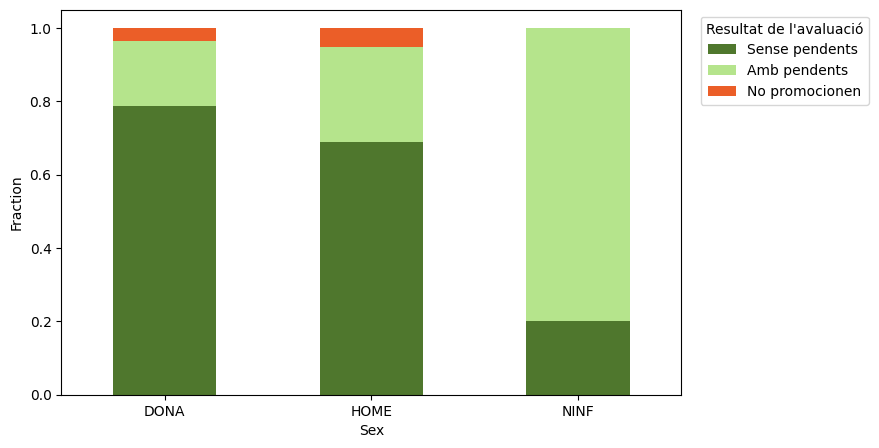

In [64]:
sense_pendentes = sense_pendentes.groupby("Sexe")["Alumnes avaluats"].sum()
amb_pendentes = amb_pendentes.groupby("Sexe")["Alumnes avaluats"].sum()
no_prom = no_prom.groupby("Sexe")["Alumnes avaluats"].sum()


# Crear un DataFrame combinando las tres Series
df_graf = pd.DataFrame({
    "Sense pendents": sense_pendentes,
    "Amb pendents": amb_pendentes,
    "No promocionen": no_prom
})

df_frac = df_graf.div(df_graf.sum(axis=1),axis=0)

# Graficar barras apiladas
df_frac.plot(kind='bar', stacked=True, color=['#4f772d', '#b5e48c', '#eb5e28'], figsize=(8,5))


plt.xlabel("Sex")
plt.ylabel("Fraction")
plt.xticks(rotation=0)
plt.legend(title="Resultat de l'avaluació", bbox_to_anchor=(1.02,1))
plt.show()


In [12]:
df_sex = df_alumnes[["Sexe","Alumnes avaluats"]]
df_sex

,Sexe,Alumnes avaluats
0,DONA,1
1,DONA,13
2,HOME,3
3,HOME,14
4,DONA,3
...,...,...
11890,DONA,70
11891,DONA,169
11892,HOME,61
11893,HOME,78


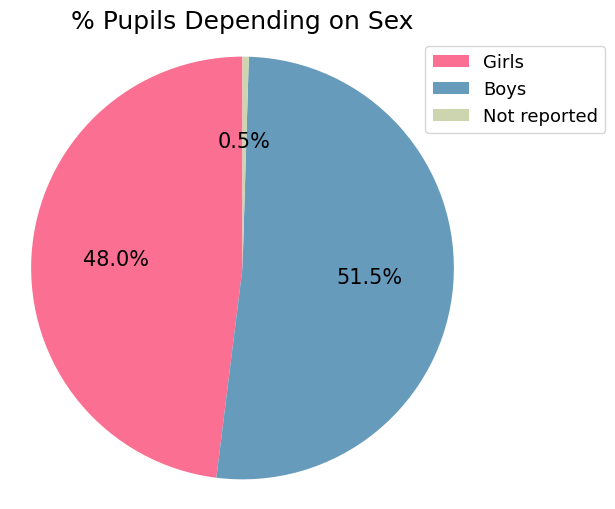

In [46]:
df_sex_sum = df_sex.groupby("Sexe")["Alumnes avaluats"].sum()
percent = df_sex_sum / df_sex_sum.sum()*100

# Diccionario de traducción
translate = {
    "HOME": "Boys",
    "DONA": "Girls",
    "NINF": "Not reported",
    "Altres": "Others"
}

# Gráfico sin etiquetas en el pie
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,            # ❗ quitamos las etiquetas dentro
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(sizes)]
)

# Agregar la leyenda
plt.legend(
    wedges,
    labels,
    fontsize=13,
    loc="upper right",
    bbox_to_anchor=(1.3, 1)
)

# Cambiar el tamaño del porcentaje
for autotext in autotexts:
    autotext.set_fontsize(15)     # << CAMBIA AQUÍ EL TAMAÑO
    autotext.set_color("black")   # opcional

plt.title('% Pupils Depending on Sex',fontsize=18)
plt.axis('equal')
plt.show()


## NECESITIES

In [74]:
df_alumnes_necessities = pd.read_csv('data_Julia/special_necesities_21_22.csv',delimiter =";")
df_alumnes_necessities.head()

,Curs,Estudis,Codi àrea territorial,Àrea territorial,Naturalesa,Titularitat,Matrícula concertada (S/N),Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRANSTORN GREU DE LA CONDUCTA,4
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRASTORN MENTAL GREU,8
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRASTORNS DE L'ESPECTRE AUTISTA,4
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIFIQUES,ALTES CAPACITATS,13
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIFIQUES,ALUMNAT NOUVINGUT,21


In [78]:
df_necesities = df_alumnes_necessities[["Naturalesa", "Sexe", "NESE descripció", "Alumnes matriculats"]].copy()
df_necesities

,Naturalesa,Sexe,NESE descripció,Alumnes matriculats
0,PRIVAT,DONA,TRANSTORN GREU DE LA CONDUCTA,4
1,PRIVAT,DONA,TRASTORN MENTAL GREU,8
2,PRIVAT,DONA,TRASTORNS DE L'ESPECTRE AUTISTA,4
3,PRIVAT,DONA,ALTES CAPACITATS,13
4,PRIVAT,DONA,ALUMNAT NOUVINGUT,21
...,...,...,...,...
843,PÚBLIC,HOME,ALTES CAPACITATS,36
844,PÚBLIC,HOME,ALUMNAT NOUVINGUT,361
845,PÚBLIC,HOME,RETARD GREU DE L'APRENENTATGE,131
846,PÚBLIC,HOME,SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS...,964


In [49]:
import pandas as pd

# Leer el CSV
df_caract = pd.read_csv('data_Julia/nationality_special_necesities_21_22.csv', delimiter=';')

# Filtrar solo filas donde el municipi sea "BARCELONA"
# Usamos str.upper() por si hay diferencias de mayúsculas/minúsculas
df_caracteristics = df_caract[df_caract["Municipi"].str.upper() == "BARCELONA"].copy()

# Seleccionar solo las columnas relevantes para análisis
columnas_utiles = [
    'Naturalesa',
    'Titularitat',
    'Nivell',
    'Codi districte',
    'Matrícula concertada (S/N)',
    'Sexe',
    'Edat',
    'Zona nacionalitat (agrupació)',
    'Necessitats específiques de suport educatiu',
    'Alumnes matriculats'
]

df_caracteristics = df_caracteristics[columnas_utiles].copy()

# Revisar el resultado
df_caracteristics.head()


,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
0,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,CENTRE I SUDAMÈRICA,SI,1
1,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,NO,1
2,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,SI,1
3,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,MAGREB,SI,1
4,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ÀSIA I OCEANIA,SI,1


Cambio de codigo de distrito a barrio

In [50]:
import pandas as pd
import geopandas as gpd

# 1) Cargar GeoJSON
gdf_barrios = gpd.read_file("barcelona_barris_clean.geojson")

# 2) Normalizar nombres
gdf_barrios.columns = gdf_barrios.columns.str.lower().str.replace(" ", "_")

# 3) Seleccionar solo columnas que necesitamos
# NOTA: usamos "nom_districte" para el nombre del distrito
df_barrios = gdf_barrios[["codi_districte", "nom_districte"]].drop_duplicates()

# 4) Extraer último dígito del código de distrito en tu CSV
df_caracteristics["codi_districte_num"] = df_caracteristics["Codi districte"] % 10

# 5) Hacer merge con el GeoJSON para obtener el nombre del distrito
df_caracter = df_caracteristics.merge(
    df_barrios,
    left_on="codi_districte_num",   # último dígito de tu CSV
    right_on="codi_districte",      # columna del GeoJSON
    how="left"
)

# 6) Opcional: eliminar columnas de códigos
df_caracter = df_caracter.drop(columns=["codi_districte", "codi_districte_num"])

# 7) Renombrar columna si quieres
df_caracter = df_caracter.rename(columns={"nom_districte": "Districte"})

df_caracter.head()


,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats,Districte
0,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,CENTRE I SUDAMÈRICA,SI,1,Ciutat Vella
1,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,NO,1,Ciutat Vella
2,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,SI,1,Ciutat Vella
3,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,MAGREB,SI,1,Ciutat Vella
4,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ÀSIA I OCEANIA,SI,1,Ciutat Vella


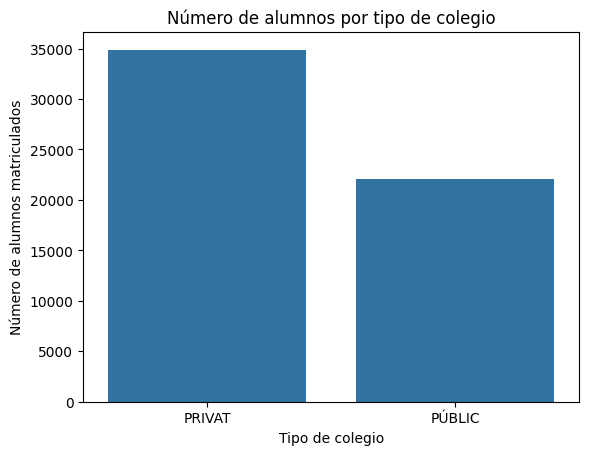

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tipo de colegio y sumar alumnos matriculados
df_tipo = df_caracter.groupby("Naturalesa")["Alumnes matriculats"].sum().reset_index()

# Graficar usando barplot
sns.barplot(data=df_tipo, x="Naturalesa", y="Alumnes matriculats")
plt.title("Número de alumnos por tipo de colegio")
plt.ylabel("Número de alumnos matriculados")
plt.xlabel("Tipo de colegio")
plt.show()

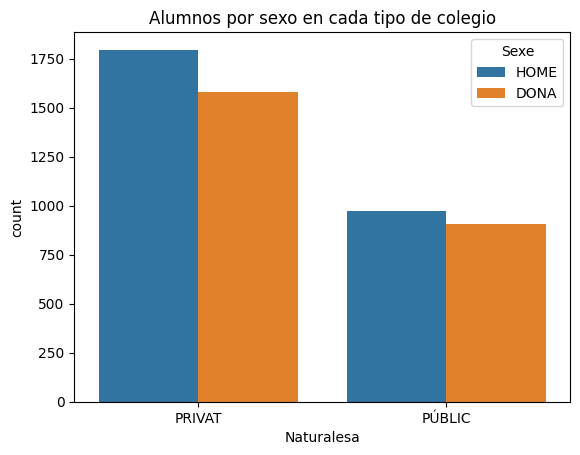

In [53]:
sns.countplot(data=df_caracter, x="Naturalesa", hue="Sexe")
plt.title("Alumnos por sexo en cada tipo de colegio")
plt.show()

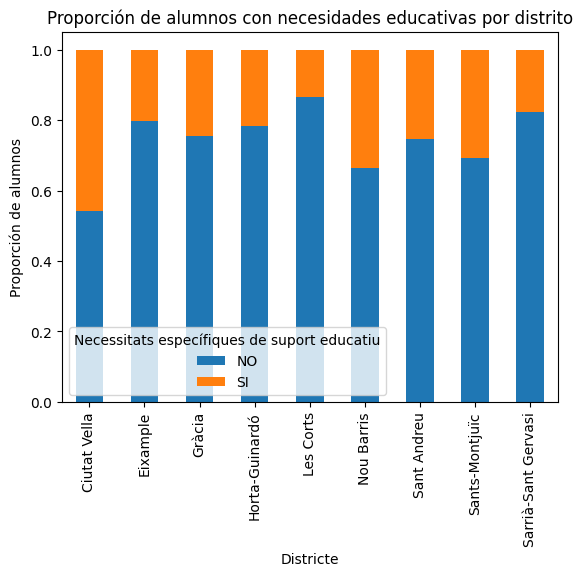

In [56]:
# Agrupar y pivotar
df_necesitats_distrito = (
    df_caracter.groupby(["Districte", "Necessitats específiques de suport educatiu"])["Alumnes matriculats"]
    .sum()
    .unstack()
)

# Normalizar por distrito (filas) para que cada fila sume 1
df_necesitats_distrito_norm = df_necesitats_distrito.div(df_necesitats_distrito.sum(axis=1), axis=0)

# Graficar
df_necesitats_distrito_norm.plot(kind="bar", stacked=True)
plt.title("Proporción de alumnos con necesidades educativas por distrito")
plt.ylabel("Proporción de alumnos")
plt.show()



Mapa con cantidad de extrangeros

In [85]:
df_barris_nac = (
    df_caracter.groupby(["Districte", "Zona nacionalitat (agrupació)"])["Alumnes matriculats"]
    .sum()
    .reset_index()
)

df_barris_nac.head()

,Districte,Zona nacionalitat (agrupació),Alumnes matriculats
0,Ciutat Vella,AMÈRICA DEL NORD,9
1,Ciutat Vella,CENTRE I SUDAMÈRICA,131
2,Ciutat Vella,ESPANYA,1411
3,Ciutat Vella,MAGREB,54
4,Ciutat Vella,RESTA D'EUROPA,35


ValueError: aspect must be finite and positive 

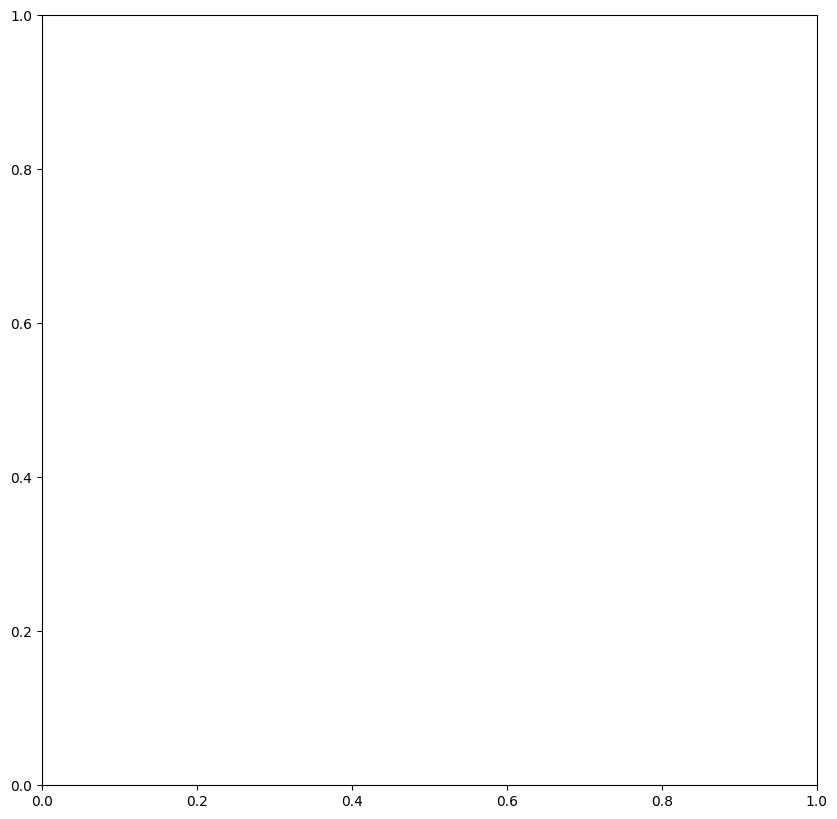

In [93]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 1️⃣ Cargar GeoJSON
gdf_barris = gpd.read_file("barcelona_barris_clean.geojson")

# 2️⃣ Convertir la columna WKT a geometría
if isinstance(gdf_barris["geometria_etrs89"].iloc[0], str):
    gdf_barris["geometry"] = gdf_barris["geometria_etrs89"].apply(wkt.loads)

# 3️⃣ Indicarle a GeoPandas que esta columna es la geometría oficial
gdf_barris = gdf_barris.set_geometry("geometry")

# 4️⃣ Mantener solo geometrías válidas
gdf_barris = gdf_barris[gdf_barris["geometry"].notna()]
gdf_barris = gdf_barris[gdf_barris["geometry"].apply(lambda x: x.is_valid)]

# 5️⃣ Asignar CRS (si no lo tiene ya)
if gdf_barris.crs is None:
    gdf_barris = gdf_barris.set_crs(epsg=25831)  # ETRS89 / UTM 31N

# 6️⃣ Probar el plot básico
fig, ax = plt.subplots(figsize=(10,10))
gdf_barris.plot(edgecolor="black", color="lightblue", ax=ax)
plt.title("Mapa de prueba de Barcelona")
plt.show()




In [92]:
gdf_barris.dtypes

Codi_Districte        int64
nom_districte        object
geometria_wgs84      object
geometry           geometry
dtype: object